This notebook exploits scikit learning tools.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA
from os.path import join
from sklearn.cluster import KMeans

Let's define some global parameters for the analysis.
- <code>n_components</code> is the dimension of the PCA reduction
- <code>n_clusters</code> is the number of clusters for the k-means

In [24]:
n_components = 3
n_clusters = 3

Load embeddings data. Although the file extension is JSON the format is actually not. Neither numpy nor pandas manage to load the data, hence we simply read the text file and convert to numpy array its values.

In [25]:
modelpath = '../data/latent_space/SimCLR' 
filename = join(modelpath, 'embeddings.json')
with open(filename, 'r') as f:
    text = f.read()

embeddings = np.array(eval(text))

Check data shape.

In [26]:
np.shape(embeddings)

(10000, 64)

# Apply k-means

Apply k-means clustering algorithm on multi-dimentional data, then predict the number of clusters and associate a label and color to each one.

In [27]:
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(embeddings)
labels = kmeans.labels_
predicted = kmeans.predict(embeddings)
centers = kmeans.cluster_centers_
colors = np.arange(0, n_clusters, 1)

Plot the clustering.

<IPython.core.display.Javascript object>


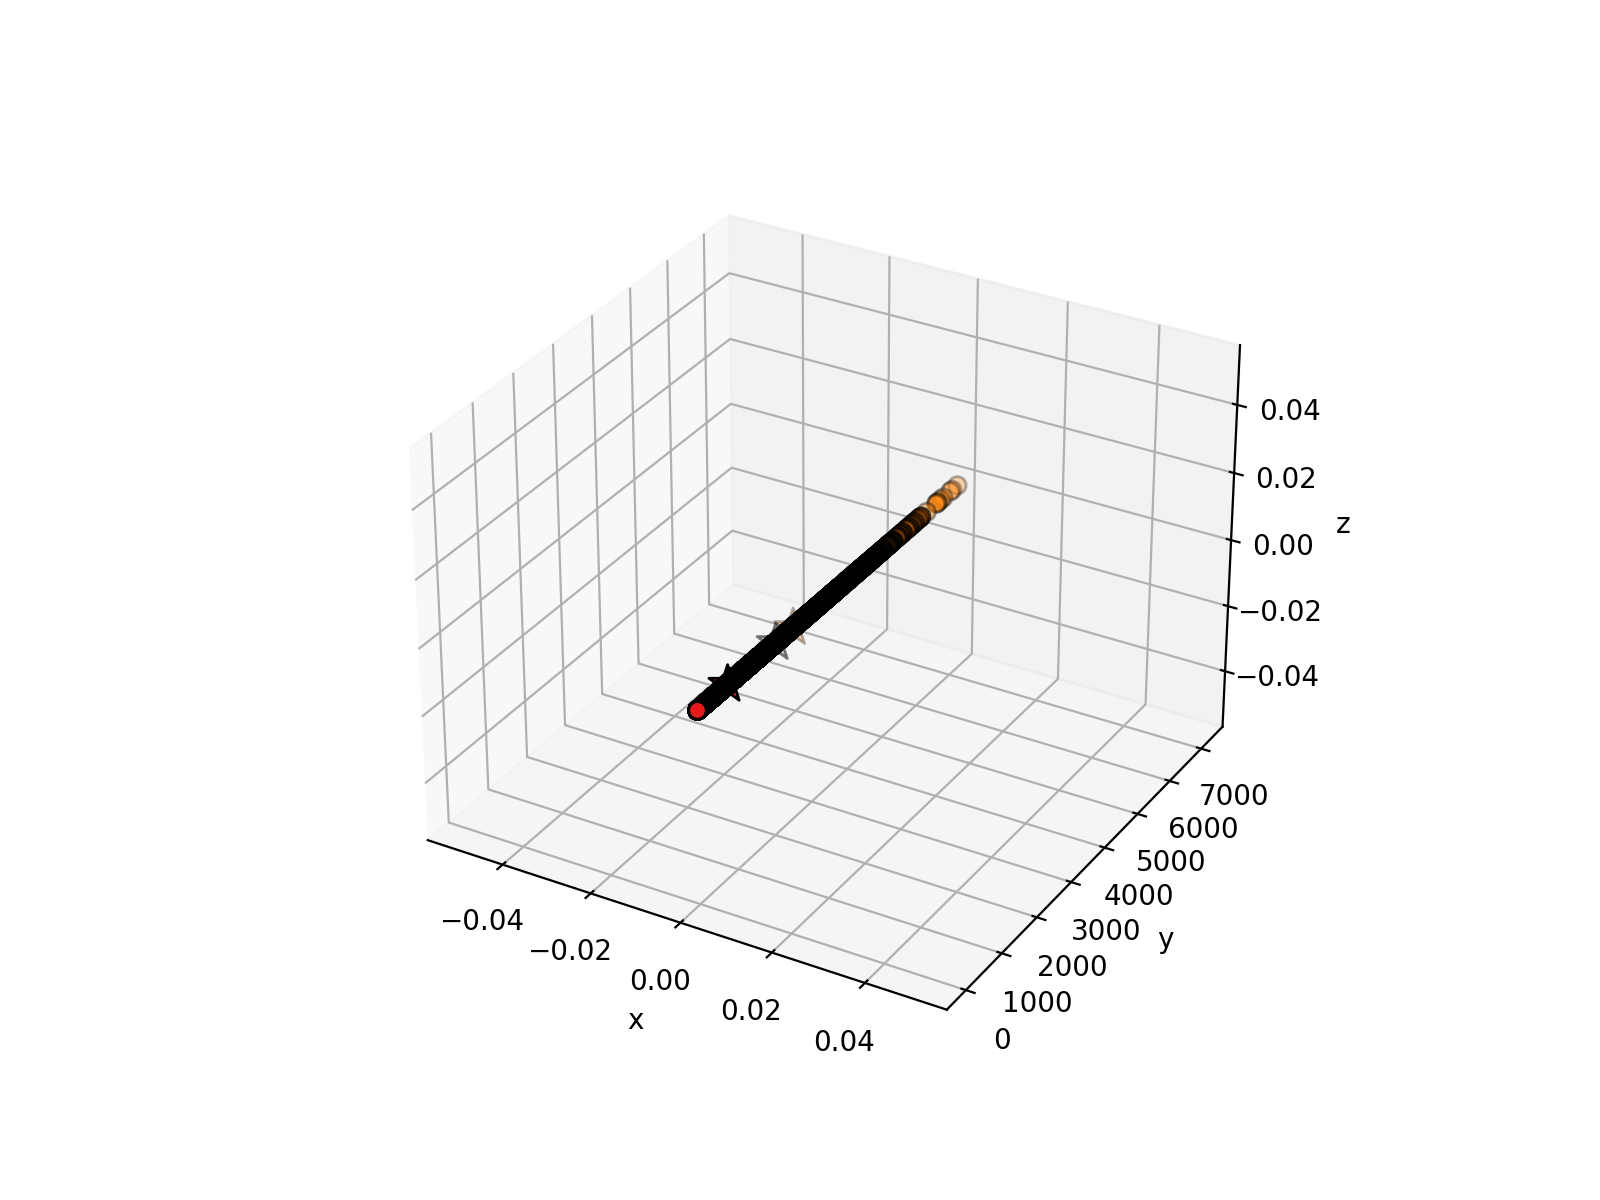

In [28]:
%matplotlib notebook

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    embeddings[:, 0],
    embeddings[:, 1],
    embeddings[:, 2],
    c=predicted.astype(float),
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.scatter(
    centers[:, 0],
    centers[:, 1],
    centers[:, 2],
    marker='*',
    c=colors,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=200,
)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plt.show()

# Apply PCA

If <code>n_components</code> parameter is not set then it will keep all of them by default. If <code>n_components == 'mle'</code> and <code>svd_solver == 'full'</code>, Minka’s MLE is used to guess the dimension. Use of <code>n_components == 'mle'</code> will interpret <code>svd_solver == 'auto'</code> as <code>svd_solver == 'full'</code>. Requires <code>n_samples >= n_features</code>. 

We want 3D reduction hence we use <code>n_components=3</code>.

In [29]:
pca = PCA(n_components=n_components)

Fit the model with data.

In [30]:
pca.fit(embeddings)

PCA(n_components=3)

In [31]:
reduced = pca.fit_transform(embeddings)
np.shape(reduced)

(10000, 3)

In [32]:
#%matplotlib notebook

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    reduced[:, 0],
    reduced[:, 1],
    reduced[:, 2],
    c=predicted.astype(float),
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

Text(0.5, 0, 'z')